### 수출관련 데이터 시각화 / 분석

In [1]:
# Reserve_Pandas - InteractiveShell
#설정변경코드
#변수 명이 두번 이상 출력되어도 모두 콘솔에서 보여줄 것
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# InteractiveShell.ast_node_interactivity : 'all' | 'last' | 'last_expr' | 'none' (기본값은 'last_expr')

# 필요 모듈 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #서브 패키지 pyplot 사용
%matplotlib inline
#그래프는 show()함수를 통해서 독립창에서 실행되는 것이 원칙
#그래프를 콘솔에서 바로 작도되록 하는 설정

# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')
    
# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action='ignore')

# pearson 상관관계 분석을 위한 package import
from scipy.stats import *

import seaborn as sns

In [33]:
# 우크라이나 전쟁 기간 제외 DataFrame
data_bfWar = data_exp[0:47]
data_bfWar

,Unnamed: 0,날짜,수출건수,수출금액,수입건수,수입금액,무역수지
0,1,2018-03,792813,51309932,1847813,44897838,6412094
1,2,2018-04,727349,49850235,1762609,43693963,6156273
2,3,2018-05,763659,50687750,1789768,44458729,6229021
3,4,2018-06,788826,51079375,1730889,45000164,6079212
4,5,2018-07,742392,51810255,1756375,44917044,6893211
5,6,2018-08,734664,51180449,1777271,44360778,6819671
6,7,2018-09,651137,50650208,1712344,41032928,9617280
7,8,2018-10,760934,54860310,1958340,48480618,6379692
8,9,2018-11,997647,51479530,1989739,46808199,4671331
9,10,2018-12,689676,48206793,1971887,44024694,4182099


In [2]:
data_exp = pd.read_csv('output/대한민국수출데이터(최종).csv')
data_exp

,Unnamed: 0,날짜,수출건수,수출금액,수입건수,수입금액,무역수지
0,1,2018-03,792813,51309932,1847813,44897838,6412094
1,2,2018-04,727349,49850235,1762609,43693963,6156273
2,3,2018-05,763659,50687750,1789768,44458729,6229021
3,4,2018-06,788826,51079375,1730889,45000164,6079212
4,5,2018-07,742392,51810255,1756375,44917044,6893211
5,6,2018-08,734664,51180449,1777271,44360778,6819671
6,7,2018-09,651137,50650208,1712344,41032928,9617280
7,8,2018-10,760934,54860310,1958340,48480618,6379692
8,9,2018-11,997647,51479530,1989739,46808199,4671331
9,10,2018-12,689676,48206793,1971887,44024694,4182099


### 수출금액 수출건수 무역수지
- 시각화
- 분석(피어슨 상관관계 / 회귀분석)

Text(0.5, 0, 'Date (Month)')

Text(0, 0.5, 'Korea Export Amount(unit:1000USD)')

Text(0, 0.5, 'Export Amount')

Text(0, 0.5, 'Trade Balance(unit:1000USD)')

Text(0.5, 1.0, 'Korea 2018.03 ~ 2022.07 Export Amount, Export Quantity, Trade Balance')

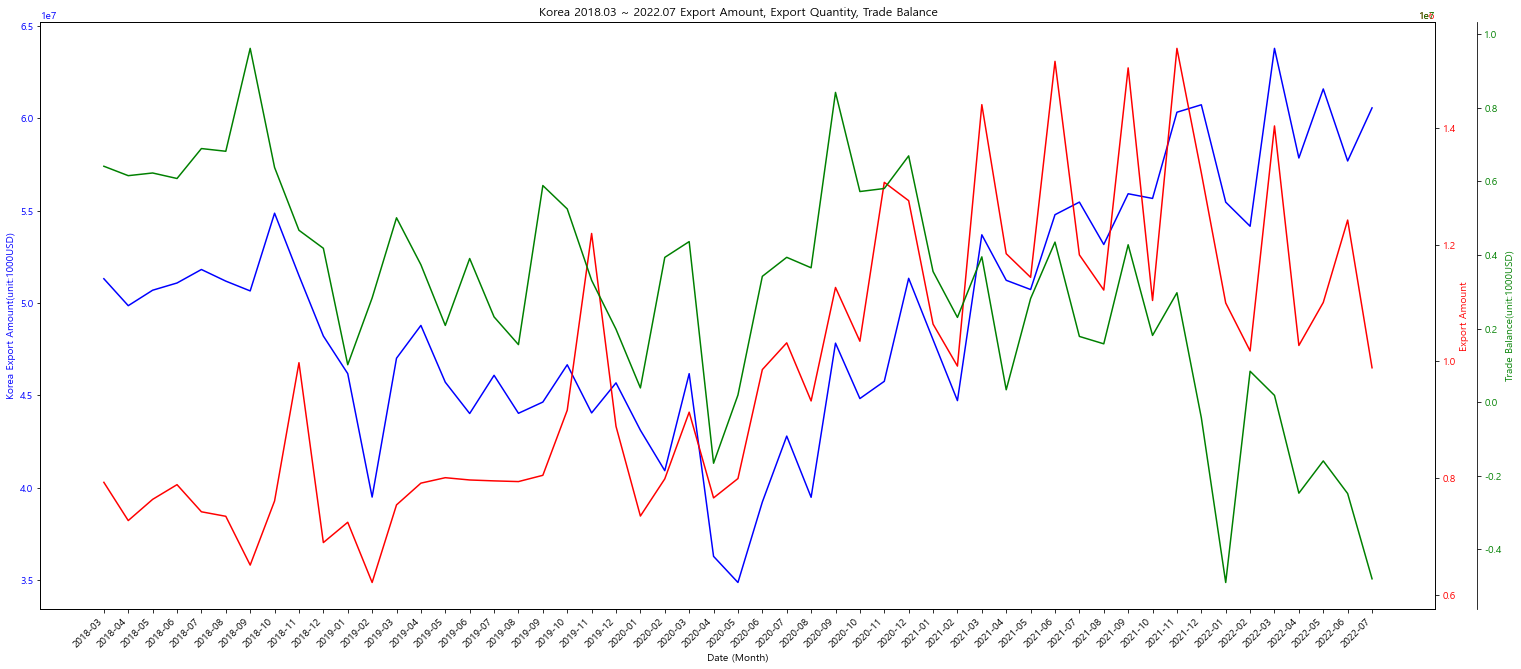

In [19]:
# 수출금액 / 수출건수 / 무역수지 그래프 시각화
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(data_exp['날짜'], data_exp['수출금액'], color=color1)
ax1.set_xlabel('Date (Month)')
ax1.set_ylabel('Korea Export Amount(unit:1000USD)', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(data_exp['날짜'], data_exp['수출건수'], color=color2)
ax2.set_ylabel('Export Amount', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(data_exp['날짜'], data_exp['무역수지'], color=color3)
ax3.set_ylabel('Trade Balance(unit:1000USD)', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.03)) ## 오른쪽 옆에 y축 추가

plt.title('Korea 2018.03 ~ 2022.07 Export Amount, Export Quantity, Trade Balance')
fig.autofmt_xdate(rotation= 45) 
plt.savefig('수출_무역수지2.png',bbox_inches='tight')
plt.show()


### 수출데이터 요소 상관관계 분석(pearson)

In [38]:
print(pearsonr(data_exp['수출건수'], data_exp['수출금액']))
print(pearsonr(data_exp['수입건수'], data_exp['수입금액']))
print()
print(pearsonr(data_exp['수출건수'], data_exp['수입건수']))
print(pearsonr(data_exp['수출금액'], data_exp['수입금액']))
print()
print(pearsonr(data_exp['수출금액'], data_exp['수출건수']))
print(pearsonr(data_exp['수출금액'], data_exp['무역수지']))
print(pearsonr(data_exp['수출건수'], data_exp['무역수지']))
print()
print(pearsonr(data_exp['수입금액'], data_exp['수입건수']))
print(pearsonr(data_exp['수입금액'], data_exp['무역수지']))
print(pearsonr(data_exp['수입건수'], data_exp['무역수지']))

(0.5407569052876722, 2.9128310774980992e-05)
(0.6906838982050425, 1.0447858483574904e-08)

(0.8342510945445676, 8.618051140883811e-15)
(0.9246125590461991, 5.0184003801140893e-23)

(0.5407569052876722, 2.9128310774980992e-05)
(-0.2396599606196555, 0.083910201145194)
(-0.20656759611692735, 0.1378000075757463)

(0.6906838982050425, 1.0447858483574904e-08)
(-0.5914006725575319, 3.1152149104066905e-06)
(-0.5461261687387041, 2.3375762319718058e-05)


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Regression Analysis on Korea Export Amount & Trade Balance(1000USD)')

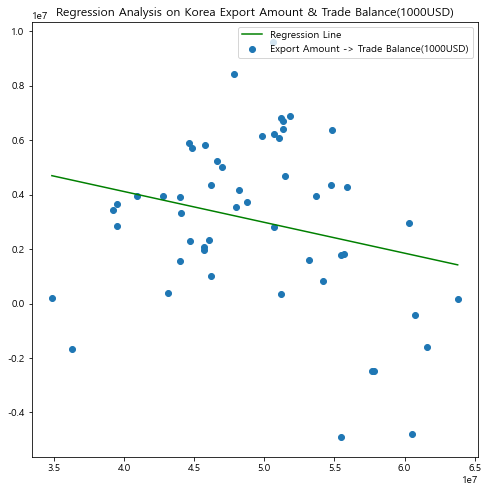

In [58]:
# 수출금액 무역수지 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수출금액'].values, data_exp['무역수지'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수출금액'].values.min(), data_exp['수출금액'].values.max()) # x축
# x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Regression Analysis on Korea Export Amount & Trade Balance(1000USD)')

# 산점도(scatter)
plt.scatter(data_exp['수출금액'].values, data_exp['무역수지'].values, label='Export Amount -> Trade Balance(1000USD)')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Regression Analysis on Korea Import Amount & Trade Balance(1000USD)')

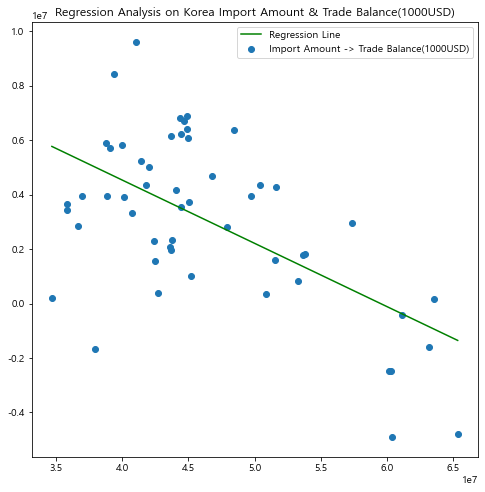

In [57]:
# 수입금액 무역수지 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수입금액'].values, data_exp['무역수지'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수입금액'].values.min(), data_exp['수입금액'].values.max()) # x축
# x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Regression Analysis on Korea Import Amount & Trade Balance(1000USD)')

# 산점도(scatter)
plt.scatter(data_exp['수입금액'].values, data_exp['무역수지'].values, label='Import Amount -> Trade Balance(1000USD)')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [51]:
dataPearson = {
    '상관계수':[0.5407569052876722,
                0.6906838982050425,
                0.8342510945445676,
                0.9246125590461991,
                0.5407569052876722, 
                -0.2396599606196555, 
                -0.20656759611692735, 
                0.6906838982050425,
                -0.5914006725575319,
                -0.5461261687387041],
    'p-value':[2.9128310774980992e-05,
                1.0447858483574904e-08,
                8.618051140883811e-15,
                5.0184003801140893e-23,
                2.9128310774980992e-05,
                0.083910201145194,
                0.1378000075757463,
                1.0447858483574904e-08,
                3.1152149104066905e-06,
                2.3375762319718058e-05],
    '통계적의의여부':[
        '있음(o)','있음(o)','있음(o)','있음(o)','있음(o)','없음(x)','없음(x)','있음(o)','있음(o)','있음(o)'
    ]
    }
dft = pd.DataFrame(dataPearson, index=[
'수출건수 & 수출금액',
'수입건수 & 수입금액',
'수출건수 & 수입건수',
'수출금액 & 수입금액',
'수출금액 & 수출건수',
'수출금액 & 무역수지',
'수출건수 & 무역수지',
'수입금액 & 수입건수',
'수입금액 & 무역수지',
'수입건수 & 무역수지'
])
dft
dft.to_csv('output/수출피어슨분석결과.csv')

,상관계수,p-value,통계적의의여부
수출건수 & 수출금액,0.540757,2.912831e-05,있음(o)
수입건수 & 수입금액,0.690684,1.044786e-08,있음(o)
수출건수 & 수입건수,0.834251,8.618051e-15,있음(o)
수출금액 & 수입금액,0.924613,5.018400e-23,있음(o)
수출금액 & 수출건수,0.540757,2.912831e-05,있음(o)
수출금액 & 무역수지,-0.239660,8.391020e-02,없음(x)
수출건수 & 무역수지,-0.206568,1.378000e-01,없음(x)
수입금액 & 수입건수,0.690684,1.044786e-08,있음(o)
수입금액 & 무역수지,-0.591401,3.115215e-06,있음(o)
수입건수 & 무역수지,-0.546126,2.337576e-05,있음(o)


In [35]:
print(pearsonr(data_bfWar['수출금액'], data_bfWar['무역수지']))
print(pearsonr(data_bfWar['수출건수'], data_bfWar['무역수지']))

(0.09444579053520731, 0.52773562624565)
(-0.13620606241926395, 0.3612942981535077)


In [4]:
# 분석을 위한 type 변환
data_exp['무역수지'].astype(int)
data_exp = data_exp.astype({'무역수지':'int'})
data_exp.info()

0     6412094
1     6156273
2     6229021
3     6079212
4     6893211
5     6819671
6     9617280
7     6379692
8     4671331
9     4182099
10    1015545
11    2830366
12    5010857
13    3733992
14    2084281
15    3903592
16    2315976
17    1562815
18    5887580
19    5252239
20    3311507
21    1980912
22     384960
23    3934572
24    4363344
25   -1662429
26     192537
27    3419211
28    3935959
29    3651302
30    8419758
31    5724739
32    5807120
33    6694203
34    3550152
35    2302271
36    3948359
37     334840
38    2814640
39    4349878
40    1785262
41    1584011
42    4277521
43    1812548
44    2972993
45    -425554
46   -4904869
47     837947
48     182246
49   -2476493
50   -1599969
51   -2487117
52   -4804890
Name: 무역수지, dtype: int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53 non-null     int64 
 1   날짜          53 non-null     object
 2   수출건수        53 non-null     int64 
 3   수출금액        53 non-null     int64 
 4   수입건수        53 non-null     int64 
 5   수입금액        53 non-null     int64 
 6   무역수지        53 non-null     int32 
dtypes: int32(1), int64(5), object(1)
memory usage: 2.5+ KB


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Korea Export Amount & Number of Exports')

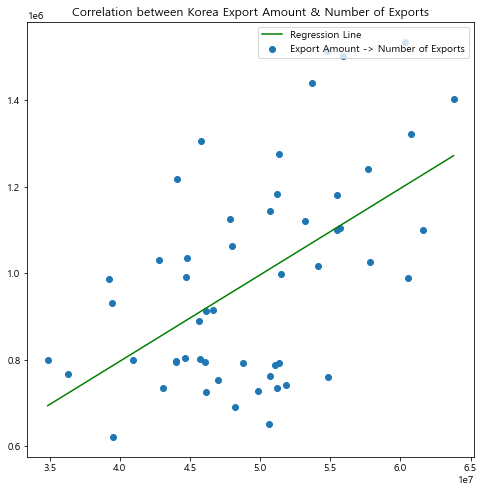

In [26]:
# 수출금액 수출건수 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수출금액'].values, data_exp['수출건수'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수출금액'].values.min(), data_exp['수출금액'].values.max()) 
# x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Correlation between Korea Export Amount & Number of Exports')

# 산점도(scatter)
plt.scatter(data_exp['수출금액'].values, data_exp['수출건수'].values, label='Export Amount -> Number of Exports')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [7]:
# 수출건수 수출금액 pearson 상관관계
print(pearsonr(data_exp['수출건수'], data_exp['수출금액']))

(0.5407569052876722, 2.9128310774980992e-05)


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Korea Number of Exports & Trade Balance')

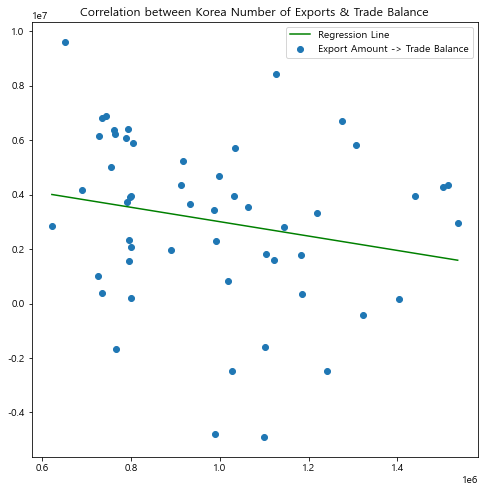

In [22]:
# 수출건수 무역수지 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수출건수'].values, data_exp['무역수지'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수출건수'].values.min(), data_exp['수출건수'].values.max()) # x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Correlation between Korea Number of Exports & Trade Balance')

# 산점도(scatter)
plt.scatter(data_exp['수출건수'].values, data_exp['무역수지'].values, label='Export Amount -> Trade Balance')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [9]:
# pearson 상관관계
print(pearsonr(data_exp['수출건수'], data_exp['무역수지']))

(-0.20656759611692735, 0.1378000075757463)


### 수입금액 수입건수 무역수지
- 시각화
- 분석(피어슨 상관관계 / 회귀분석)

Text(0.5, 0, 'Date(Month)')

Text(0, 0.5, 'Import Amount')

Text(0, 0.5, 'Number of Import')

Text(0, 0.5, 'Trade Balance')

Text(0.5, 1.0, 'Korea 2018.03 ~ 2022.07 Import Amount, Number of Import, Trade Balance')

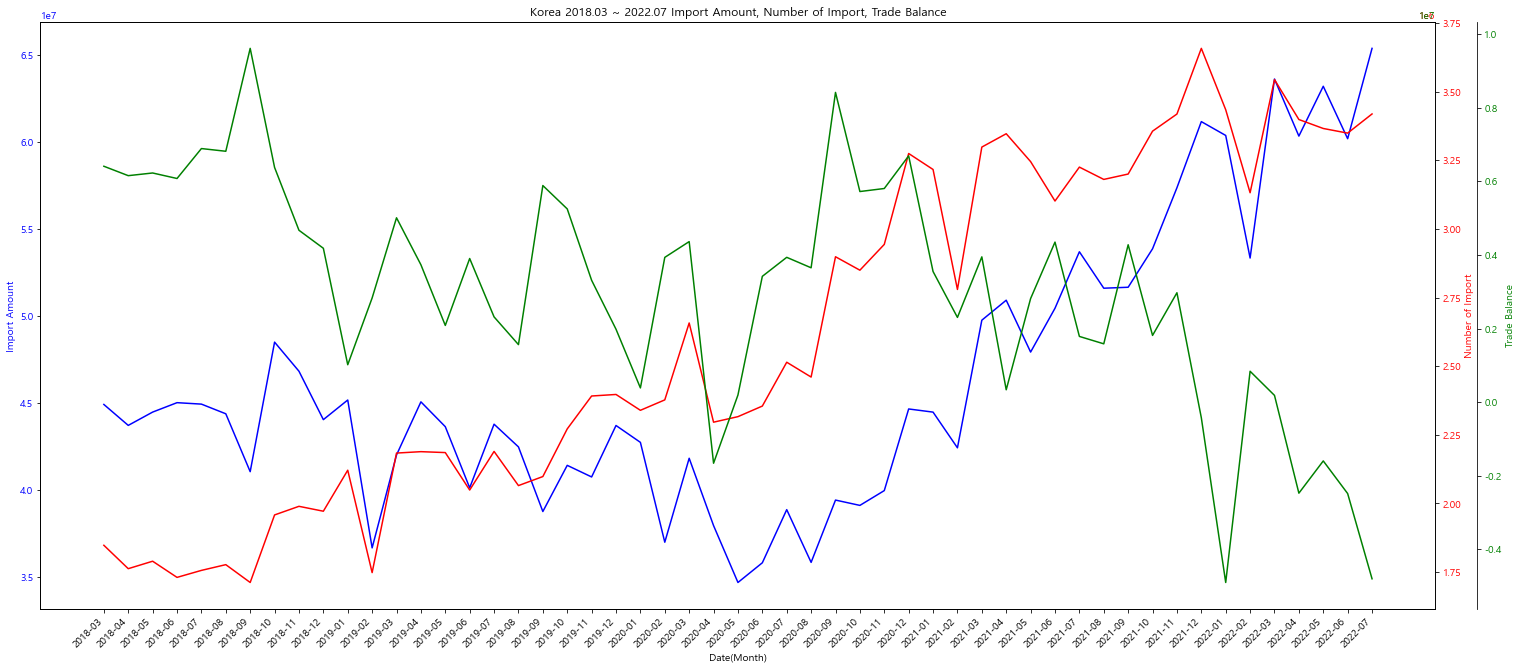

In [10]:
# 수입금액 / 수입건수 / 무역수지 그래프 시각화
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot()

color1 = 'b'
ax1.plot(data_exp['날짜'], data_exp['수입금액'], color=color1)
ax1.set_xlabel('Date(Month)')
ax1.set_ylabel('Import Amount', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
 
color2 = 'r'
ax2 = ax1.twinx()
ax2.plot(data_exp['날짜'], data_exp['수입건수'], color=color2)
ax2.set_ylabel('Number of Import', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

color3 = 'g'
ax3 = ax1.twinx()
ax3.plot(data_exp['날짜'], data_exp['무역수지'], color=color3)
ax3.set_ylabel('Trade Balance', color=color3)
ax3.tick_params(axis='y', labelcolor=color3)
ax3.spines.right.set_position(("axes", 1.03)) ## 오른쪽 옆에 y축 추가

plt.title('Korea 2018.03 ~ 2022.07 Import Amount, Number of Import, Trade Balance')
fig.autofmt_xdate(rotation= 45) 
plt.show()

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Korea Import Amount & Number of Imports')

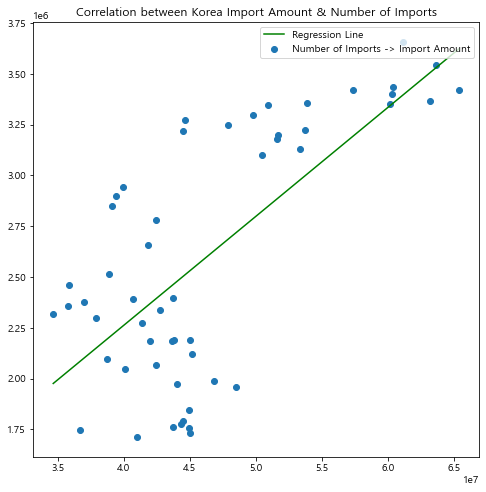

In [10]:
# 수입금액 수입건수 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수입금액'].values, data_exp['수입건수'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수입금액'].values.min(), data_exp['수입금액'].values.max()) # x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Correlation between Korea Import Amount & Number of Imports')

# 산점도(scatter)
plt.scatter(data_exp['수입금액'].values, data_exp['수입건수'].values, label='Number of Imports -> Import Amount')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [12]:
# pearson 상관관계
print(pearsonr(data_exp['수입건수'], data_exp['수입금액']))

(0.6906838982050425, 1.0447858483574904e-08)


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Korea Import Amount & Trade Balance')

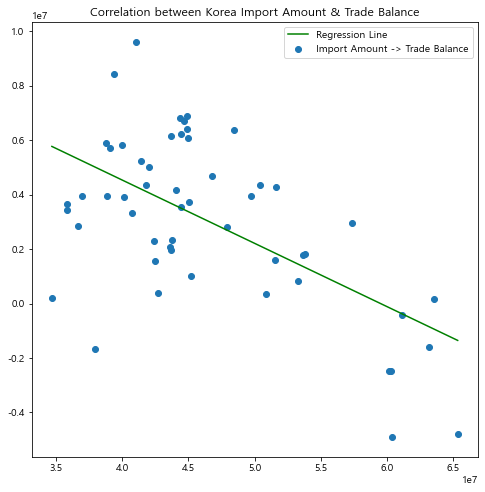

In [16]:
# 수입금액 무역수지 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수입금액'].values, data_exp['무역수지'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수입금액'].values.min(), data_exp['수입금액'].values.max()) # x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Correlation between Korea Import Amount & Trade Balance')

# 산점도(scatter)
plt.scatter(data_exp['수입금액'].values, data_exp['무역수지'].values, label='Import Amount -> Trade Balance')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [14]:
# pearson 상관관계
print(pearsonr(data_exp['수입금액'], data_exp['무역수지']))

(-0.5914006725575319, 3.1152149104066905e-06)


<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Correlation between Korea Number of Imports & Trade Balance')

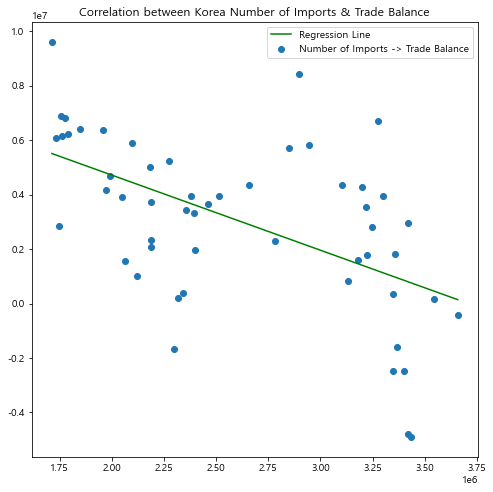

In [11]:
# 수입건수 무역수지 회귀직선구하기
poly_fit1 = np.polyfit(data_exp['수입건수'].values, data_exp['무역수지'].values, 1)
poly_1d = np.poly1d(poly_fit1)
xs = np.linspace(data_exp['수입건수'].values.min(), data_exp['수입건수'].values.max()) # x axis
ys = poly_1d(xs)
plt.figure(figsize=(8,8))
plt.title('Correlation between Korea Number of Imports & Trade Balance')

# 산점도(scatter)
plt.scatter(data_exp['수입건수'].values, data_exp['무역수지'].values, label='Number of Imports -> Trade Balance')

# 회귀직선
plt.plot(xs, ys, color='g', label='Regression Line')

# 범례(legend)
plt.legend(loc='upper right')

plt.show()

In [13]:
# pearson 상관관계
print(pearsonr(data_exp['수입건수'], data_exp['무역수지']))

(-0.5461261687387041, 2.3375762319718058e-05)


<Figure size 2160x720 with 0 Axes>

Text(0.5, 0, 'Date (Month)')

Text(0, 0.5, 'Export Amount(unit:1000USD)')

Text(0.5, 1.0, 'Korea Export Amount (unit:1000USD)')

(32000000.0, 64000000.0)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(

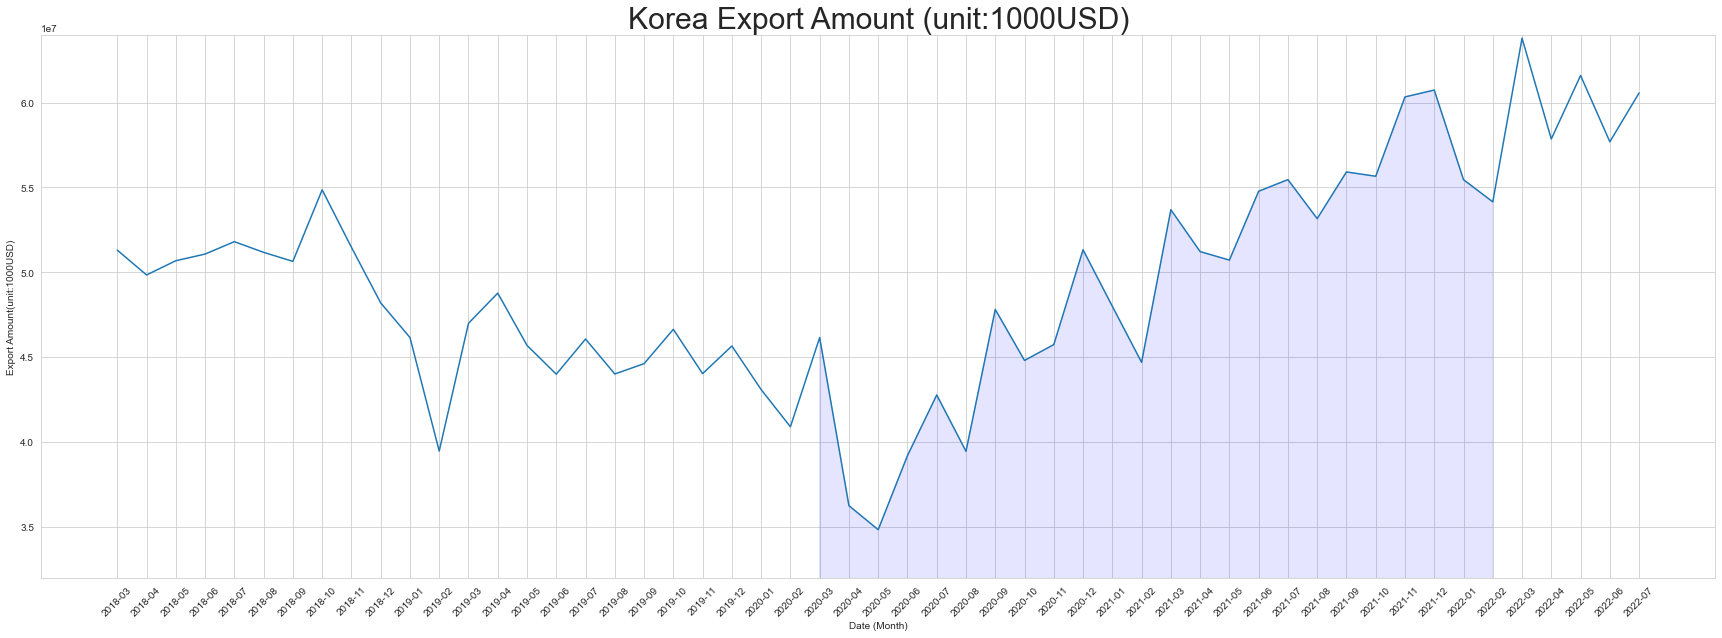

In [14]:
### 분석 대상 그래프 표현
# 전세계 월별 코로나 확진자 추이
sns.set_style('whitegrid')
plt.figure(figsize=(30,10))
x = data_exp['날짜']
y = data_exp['수출금액']
plt.plot(x,y)

plt.xlabel('Date (Month)')
plt.ylabel('Export Amount(unit:1000USD)')
plt.title('Korea Export Amount (unit:1000USD)', size=30)
plt.ylim((32000000,64000000))
# 가독성을 위해 x축 시각표현 수정
plt.xticks(rotation=45)

plt.fill_between(x[24:48], y[24:48], color='blue', alpha=0.1)

plt.show()